<a href="https://colab.research.google.com/github/emanbuc/ultrasonic-vision/blob/main/notebooks/analisi_dati_sensori.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisi dati acquisiti dai sensori nella configurazione a 7 sensori

Il dataset _"20210102_alldata"_ include tutte le misure acquisite in data 2021-01-02 con il sistema assemblato in configurazione a 7 sensori. Le distanze orizzontali e verticali tra i sensori ed il bersaglio in tutti gli esperimenti erano comprese tra 5cm e 60 cm. 

## Sistema di acquiszione dati

TBC - Breve descrizione del sistema

## Stima della distanza basata sul tempo di volo

La stima si basa sulla misurazione del tempo di volo (TOF) che separa l'emissione dell'impulso dalla ricezione del primo eco sonar.

TBC


### Propagazione degli ultrasuoni

Nel caso di oggetti con dimensioni molto maggiori della lunghezza d'onda all'interfaccia ARIA-OGGETTO le onde sonore incidenti generano on onda riflessa.  La grande differenza di impedenza acustica all'interfaccia  "ARIA - ACQUA" provoca una riflessione quasi totale, però solo l'onda riflessa che raggiunge il sensore è utile per stimare la distanza. La direzione dell'onda rilfessa dipende dall'angoli di incidenza. (vale a legge di Snell).

![Riflessione Ultrasuoni](https://raw.githubusercontent.com/emanbuc/ultrasonic-vision/main/media/riflessione_trasmissione_ultrasuoni.png)


Il suono in aria si propaga a circa 330m/s
Nel caso dei sensori HC-SR.04 gli impulsi hanno una frequenza di 40Kz e quindi una lunghezza d'onda teorica pari a 330/40000 = 0.00825 m (8mm). 

- Oggetti con dimensioni dell'ordine di gradezza di alcuni millimetri o di qualche centimetro possono possono generare fenomeni di diffrazione che possono interferire con la stima della distanza.

- oggetti con superfici "complesse" o in generale non approssimabili come superfici piane di dimensioni molto maggiori di 8mm (ad esempio con parti in rilievo, bordi, superfieci con raggio di curvatura dell'orine dei 10mm, ...) potrebero non essere compatibili con il tipo di sensore utilizzato

- oggetti con superfici curve o planari, ma non parallele al piano frontale del sensore possono riflettere l'impulso sonoro in una direzione diversa da quelle dove si trova il sensore e generare tre tipi di anomalie:
    - eco non rilevato
    - eco rilevato dopo riflessioni multiple e distanza molto maggiore di quella reale, ma nel range standard del sensore
    - eco rilevato dopo riflessioni multiple e distanza molto maggiore di quella reale e fuori dal range standard del sensore

## Risoluzione spaziale del sistema di misura

Il campo acustico dei traduttori dipende dalla dimensione del trasduttore e dalla lunghezza d'onda. 
![campo acustico trasduttore](https://github.com/emanbuc/ultrasonic-vision/raw/main/media/campo_acustico_trasduttore_ultrsuoni.png)

Nota: immagine tratta da https://www.albertobarbisan.it/didattica/ultrasuoni.pdf

Nel caso dei sensori HC-SR-004 il campo acustico lonano è approssimabile con un cono con apertura di circa 15°. L'area di rilevamento del sensore ad una distanza d è quindi pari a d*sin(15):
- un cerchio di raggio 5 cm a 20 cm di distanza
- un cerchio di raggio 13 cm a 50 cm di distanza
- un cerchio di raggio 26 cm ad 100 cm di distanza

## Limiti fisici del sistema

In base alle considerazioni di cui ai paragrafi precedenti è appare ragionevole iportizzare le seguenti limitazioni di utilizzo del sistema 

- il bersaglio deve avere un area equivalente parallela al piano frontale di almeno uno dei sensori dell'ordine di gradezza dei 10 cm
- superfici complesse (bordi, elementi in rilievo, ...) con dimensioni dell'ordine di grandezza di alcuni millimetri potrebbero interferire con la misura


### Test del sistema

Per verificare sul campo le potenzialità ed i limiti del sistema sono stati condotti diversi esperimenti utilizzando vari oggetti. Lo scopo di questa attività era quello di verificare il corretto funzionamento del sistema di misura della distanza e contemporanemante di creare dei dataset "etichettati" da utilizzare in seguito per l'addestramento del sistema di classificazione degli oggetti.

Gli esperimenti sono stai ripetuti più volte riposizionando ogni volta l'oggetto. Ad ogni ripetizione l'oggetto è stato posizionato in una posizione leggermente diversa da quella precedente, in modo da produrre un dataset di addestramento più simile alle condizioni operative del sistema in produzione.

- EMPTY_SEVEN (nessun oggetto. solo pannelli di delimitazione)
- SQUARE_MILK_90 ![SQUARE_MILK_90](https://github.com/emanbuc/ultrasonic-vision/raw/main/media/SQUARE_MILK_90.jpg)
- SQUARE_MILK_45 ![SQUARE_MILK_45](https://github.com/emanbuc/ultrasonic-vision/raw/main/media/SQUARE_MILK_45.jpg))
- BEAN_CAN ![BEAN_CAN](https://github.com/emanbuc/ultrasonic-vision/raw/main/media/BEAN_CAN.jpg)
- SOAP_BOTTLE_FRONT ![SOAP_BOTTLE_FRONT](https://github.com/emanbuc/ultrasonic-vision/raw/main/media/SOAP_BOTTLE_FRONT.jpg)
- SOAP_BOTTLE_SIDE ![SOAP_BOTTLE_SIDE](https://github.com/emanbuc/ultrasonic-vision/raw/main/media/SOAP_BOTTLE_SIDE.jpg)
- GLASS ![GLASS](https://github.com/emanbuc/ultrasonic-vision/raw/main/media/GLASS.jpg)
- RECTANGULAR_BOX  ![RECTANGULAR_BOX](https://github.com/emanbuc/ultrasonic-vision/raw/main/media/RECTANGULAR_BOX.jpg)
- RECTANGULAR_BOX_SIDE ![RECTANGULAR_BOX_SIDE](https://github.com/emanbuc/ultrasonic-vision/raw/main/media/RECTANGULAR_BOX_SIDE.jpg)
- WALL_BALL ![BALL_WALL](https://github.com/emanbuc/ultrasonic-vision/raw/main/media/BALL_WALL.jpg)
- BALL_CENTER ![BALL_CENTER](https://github.com/emanbuc/ultrasonic-vision/raw/main/media/BALL_CENTER.jpg)
- BEER_BOTTLE ![BEER_BOTTLE](https://github.com/emanbuc/ultrasonic-vision/raw/main/media/BEER_BOTTLE.jpg)

## Panoramica sui dati acquisiti



TCB - BREVE DESCRIZIONE DELLE COLONNE DEL DATAFRAME

In [ ]:
import matplotlib.pyplot as plt
import pandas
url = "https://raw.githubusercontent.com/emanbuc/ultrasonic-vision/main/dataset/20210102_alldata.csv"

names = ['HCSR04_001', 'HCSR04_002', 'HCSR04_003', 'HCSR04_004', 'HCSR04_005', 'HCSR04_006', 'HCSR04_007','ObjectClass']
data = pandas.read_csv(url, usecols=names)

### Distribuzione (Univariate Plots)

 TBC - Geometria del sistema fisico e range dei dati attesi


I grafici mostrano che molti sensori hanno restituito misure fuori range e che sono presenti numerosi _outlier_. Per comprendere meglio la natura delle anomalie sono state poi analizzate le misure raggruppandole in base al tipo di oggetto presente all'interno dell'area di misura.


     HCSR04_001  HCSR04_002  HCSR04_003  ...  HCSR04_006  HCSR04_007     ObjectClass
0         53.25       54.19       56.01  ...       51.90       23.33     EMPTY_SEVEN
1         53.21       54.23       55.98  ...       51.39      117.41     EMPTY_SEVEN
2         53.16       54.62       56.41  ...       51.91      109.82     EMPTY_SEVEN
3         53.18       54.64       56.03  ...       51.44      104.63     EMPTY_SEVEN
4         53.31       54.58       56.39  ...       51.40      105.24     EMPTY_SEVEN
..          ...         ...         ...  ...         ...         ...             ...
496       40.35       19.25       38.56  ...       57.15      119.41  SQUARE_MILK_90
497       40.43       19.68       38.56  ...       57.93      112.06  SQUARE_MILK_90
498       40.34       19.70       38.49  ...       57.62      111.50  SQUARE_MILK_90
499       40.42       19.70       38.51  ...       57.91      111.54  SQUARE_MILK_90
500       40.30       19.31       38.57  ...       57.53      110

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  # Remove the CWD from sys.path while we load stuff.


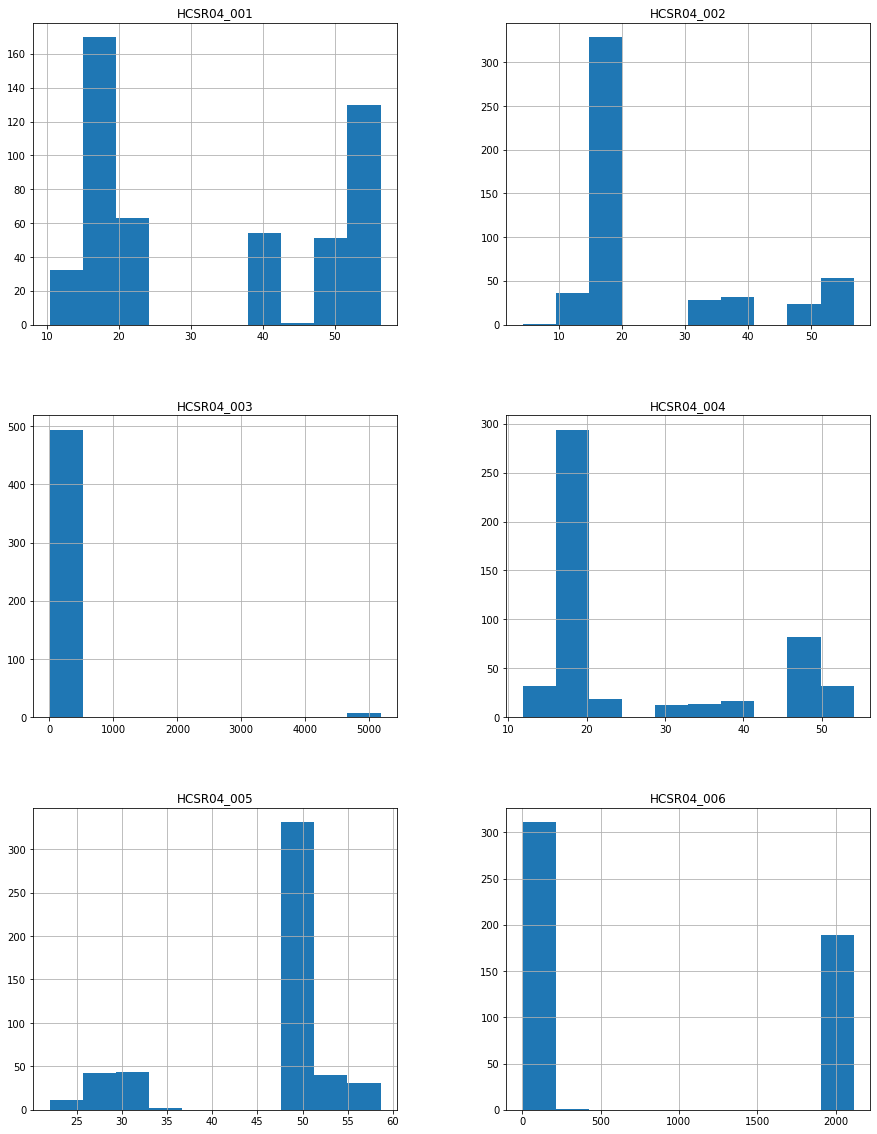

In [1]:

print(data)
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
data.iloc[:,0:6].hist(ax = ax)
plt.show()

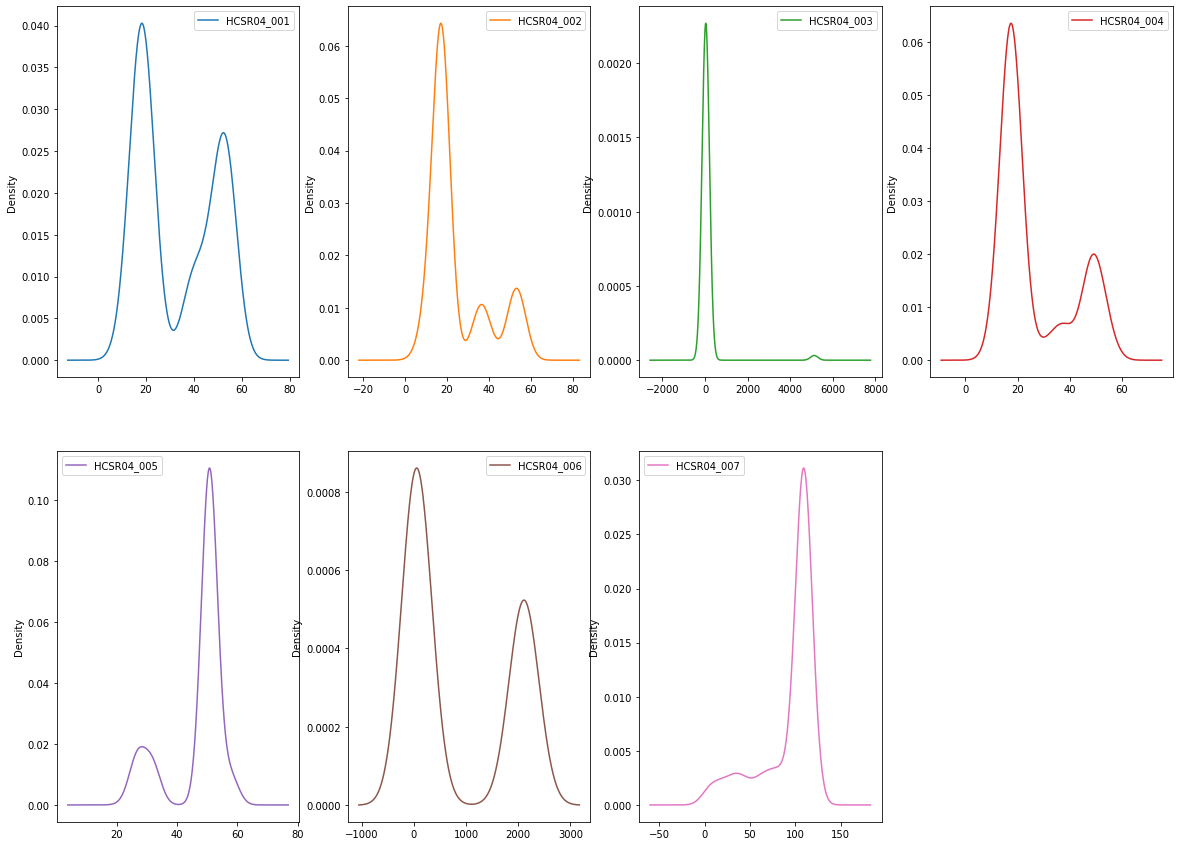

In [2]:
data.plot(kind='density', subplots=True, layout=(2,4), sharex=False, figsize=(20,15))
plt.show()

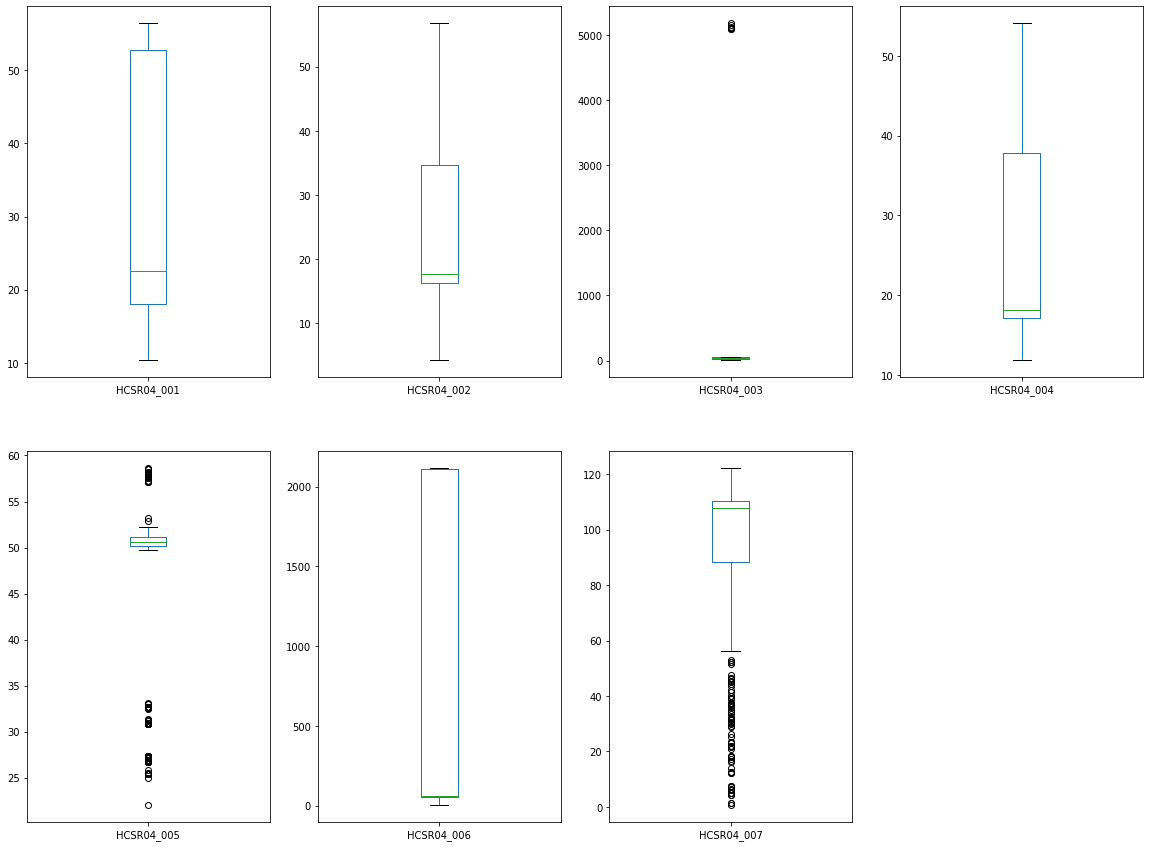

In [3]:
data.plot(kind='box', subplots=True, layout=(2,4), figsize=(20,15))
plt.show()

In [4]:
groupedByClass = data.groupby(['ObjectClass'])
groupedByClass.first()

,HCSR04_001,HCSR04_002,HCSR04_003,HCSR04_004,HCSR04_005,HCSR04_006,HCSR04_007
ObjectClass,,,,,,,
BALL_CENTER,55.59,16.09,54.78,17.55,51.73,57.48,96.38
BEAN_CAN,52.81,15.54,3.97,19.05,50.48,2115.51,109.24
BEER_BOTTLE,18.98,18.62,18.80,18.79,50.78,119.22,111.96
EMPTY_SEVEN,53.25,54.19,56.01,53.70,50.57,51.90,23.33
GLASS,53.25,18.50,22.04,17.39,49.88,2114.98,104.41
RECTANGULAR_BOX,48.56,50.96,14.53,30.73,27.14,25.80,96.35
RECTANGULAR_BOX_SIDE,10.36,4.26,35.71,12.94,22.03,23.99,122.23
SOAP_BOTTLE_FRONT,16.99,15.77,15.69,16.25,50.74,2115.85,111.68
SOAP_BOTTLE_SIDE,19.46,53.24,33.39,18.03,50.87,2114.00,107.46


### Analisi dati esperimento senza oggetto (Label = "EMPTY_SEVEN")

Per prima cosa sono state esaminati i risultati di tutte le ripetizioni dell'esperimento **EMPTY_SEVEN**. In questo esperimento nell'area di misura non era presente nessun oggetto, ma solo i pannelli di delimitazione paralleli al piano frontale dei sensori 001, 002, 003, 004 ad un distanza di circa 55 cm. Il pannello superiore che ospita i sensori 005, 006 e 007 è montato ad una altezza di circa 50 cm rispetto al piano al pavimento dell'area di misurazione. 

Gli errori di stima presenti in questo esperimento sono dovuti sclusivamente al sistema di misura.

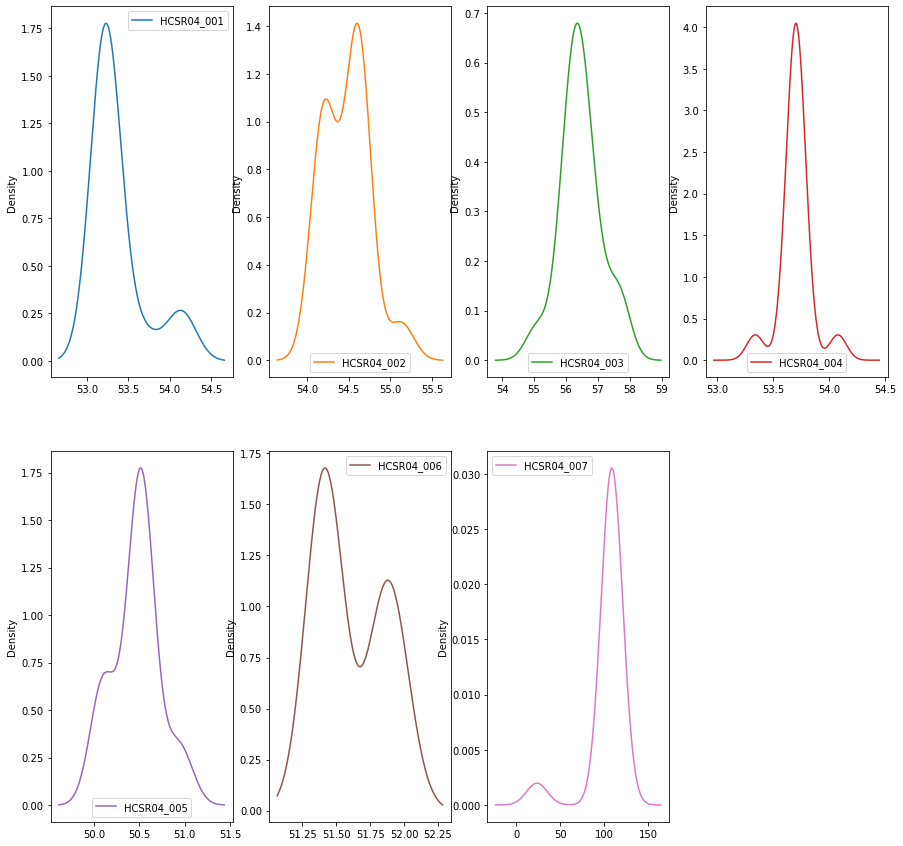

In [5]:
df_EMPTY_SEVEN = groupedByClass.get_group('EMPTY_SEVEN')
df_EMPTY_SEVEN.plot(kind='density', subplots=True, layout=(2,4), sharex=False, figsize=(15,15))
plt.show()

Il sensore *HC-SR-04_007* è affetto da un errore sistematico che sposta il picco della distribuzione da 50 a 100 cm circa. La causa del problema non è stata individuata, ma alcuni esperimenti specifici hanno mostrato che la misura del tempo di volo fornita è comunque fortemente correlata alla distanza del bersaglio dal sensore. La distanza stimata da HC-SR-04_007 contiene quindi informazione utile e i dati prodotti non sono stati scartati.

Tutti gli altri sensori forniscono un stima della distanza compatibile con la precisione del sensore (+/- 3cm). Rimangono quindi da individuare le cause delle altre anomalie presenti nei dati degli atri esperiementi. 


#### AWGN Model ?

TBC - La stima fornita dai sensori è approssimabile come AWGN ?

### Analisi dati esperimenti con oggetti

Il dataset include i dati raccolti posizionando diversi tipi oggetti all'interno dell'area di misura approssimativamente nella stessa posizione. Gli esperimenti sono stai ripetuti più volte riposizionando ogni volta l'oggetto. Ad ogni ripetizione l'oggetto è stato posizionato in una posizione leggermente diversa da quella precedente, in modo da produrre un dataset di addestramento più simile alle condizioni operative del sistema in produzione.

A titolo di esempio viene riportata l'analisi dell'esperimento "BEAN_CAN" eseguito su un barattolo di fagioli in scatola con dimensioni vicine al limite inferiore ammissibile e una geometria idonea ad evidenzare eventuali problemi nella stima delle distanze (superficie cilindrica, presenza di superfici complesse (elementi tridimensionali e bordi)

L'esperimento è stato ripetuto tre volte rimuovendo e riposizionando l'oggetto. Per ogni posizionamento sono state ottenute rispettivamente 10,11 e 15 misure valide contenenti la stima della distanza da tutti i sensori. (in totale 36 misure)I risultati delle tre ripetizioni sono stati riportati nei file:
- [20210102_114551_TRAIN_BEAN_CAN.csv](..sample_acquisitions\7sensors\20210102\20210102_114551_TRAIN_BEAN_CAN.csv)
-[20210102_153734_TRAIN_BEAN_CAN.csv](..sample_acquisitions\7sensors\20210102\20210102_153734_TRAIN_BEAN_CAN.csv)
-[20210102_165012_TRAIN_BEAN_CAN.csvv](..sample_acquisitions\7sensors\20210102\20210102_165012_TRAIN_BEAN_CAN.csv)

I grafici delle distribuzioni mostrano due picchi ben distinti, mentre il terzo gruppo di dati non è evidente dai grafici perchè le stime delle distanze ottenute nella seconda e nella terza ripetizione sono piuttosto simili. 

**Stime delle distanze orizzontali:**

- Nella prima ripetizione il sensori HCSR04_001 e HCSR04_003 hanno fornito delle stime molti vicine al caso "oggetto non presente" (EMPTY_SEVEN). Nelle altre ripetizioni ha dato delle stime vicine alla distanza reale di circa 20 cm
- Nella prima ripetizione il sensori HCSR04_001 e HCSR04_003 hanno prodotto delle stime sostanzialmente corrette in tutte le ripetizioni

**Stime delle distanze verticali:**
- Il sensore 005 non "ha visto" l'oggetto in nessuna delle ripetizioni
- il sensore 006 ha fornito un stima completamente errata (2000 cm) nel primo esperimento e sotanzialmente corretta (circa 40 cm) nelle altre due ripetizioni
- I dati del sensore 007 presentano una distribuzione diversa dal caso "empty seven", ma non è chiaro come questa differenza sia correlata alla presenza dell'oggetto nell'area di misura.





#### Caso di studio barattolo di fagioli (Label= BEAN_CAN)

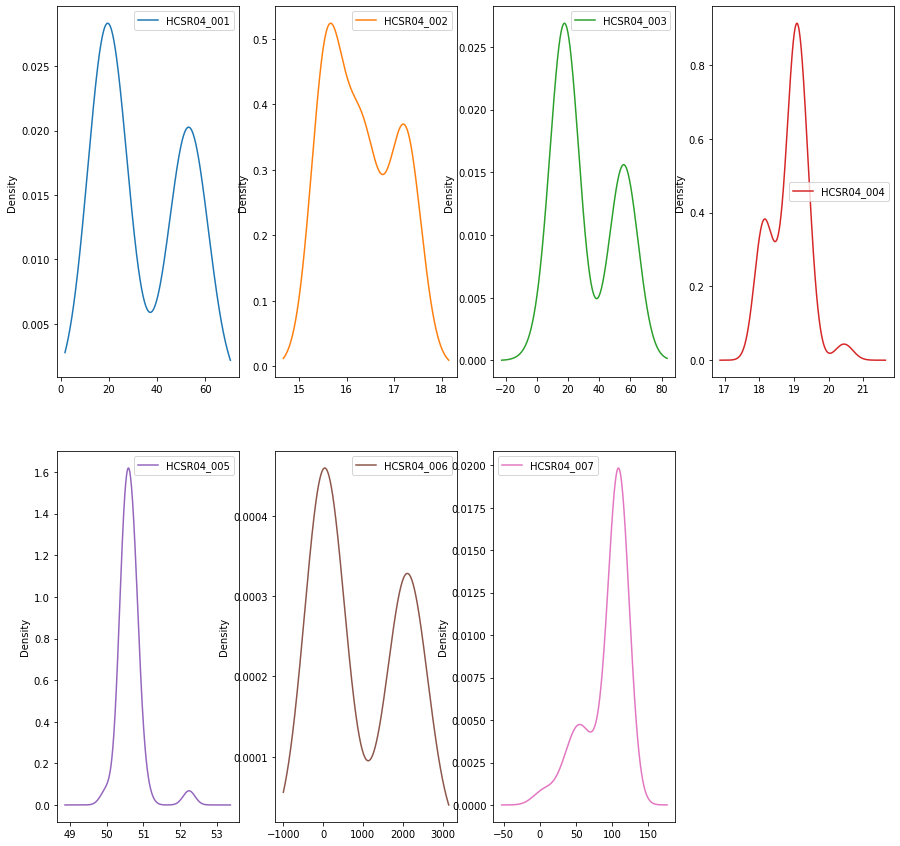

In [6]:
df_BEAN_CAN = groupedByClass.get_group('BEAN_CAN')
df_BEAN_CAN.plot(kind='density', subplots=True, layout=(2,4), sharex=False, figsize=(15,15))
plt.show()

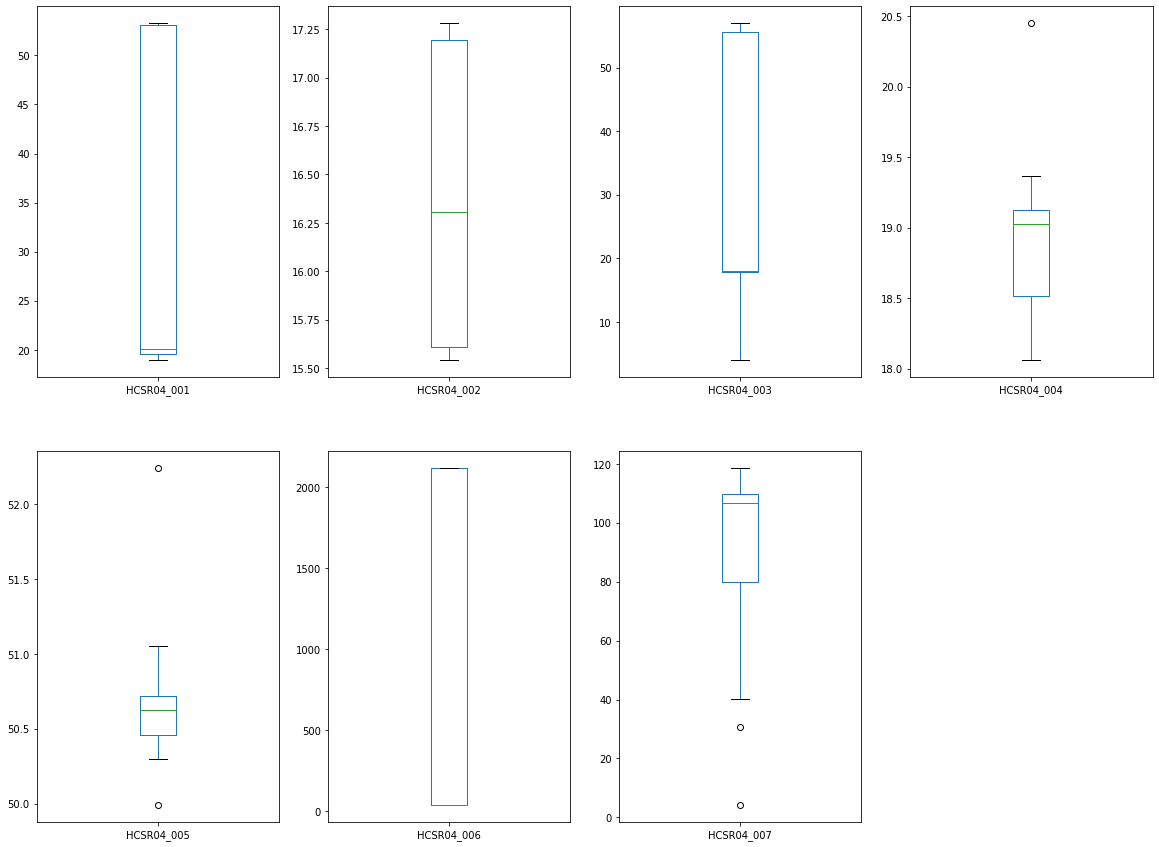

In [7]:
df_BEAN_CAN.plot(kind='box', subplots=True, layout=(2,4), figsize=(20,15))
plt.show()

In [11]:
df_BEAN_CAN

,HCSR04_001,HCSR04_002,HCSR04_003,HCSR04_004,HCSR04_005,HCSR04_006,HCSR04_007
44,52.81,15.54,3.97,19.05,50.48,2115.51,109.24
45,53.11,15.57,18.27,19.14,50.45,2114.53,106.68
46,53.18,15.65,55.59,19.12,50.49,2114.58,93.18
47,52.79,15.61,55.56,19.05,50.42,2114.95,56.28
48,53.21,15.68,55.60,19.05,50.46,2114.89,52.39
49,53.24,15.67,55.56,19.03,50.55,2114.74,78.49
50,53.21,15.56,56.95,18.98,50.50,2114.59,30.76
51,53.21,15.55,55.60,19.04,50.48,2115.73,106.65
52,53.16,15.60,53.52,19.00,50.44,2115.19,47.66
53,53.22,15.64,56.54,18.99,50.46,2115.16,106.57


## Conclusioni

I dati dimostrano che la distanza stimata dai singoli sensori dipende fortemente dalla posizione dell'oggetto all'interno dell'area di rilevamento. In pratica il sistema di misura funziona.

I dati evidenziano però almeno due importanti criticità:

- La relazione tra la distanza stimata e quella reale non è sempre lineare. Nel caso di posizionemento dell'oggetto non ideale la misura è affetta da errori non sistematico anche importante.

- Il pattern dell distanze sitmate dipende in maniera non facilmente separabile sia dal tipo di oggetto presente nell'area di rilevamento che dalla posizione dell'oggetto rispetto ai sensori.

In particolare il secondo punto crea una criticità importante da affrontare nello sviluppo di un sistema di classificazione degli oggetti indipendente dalla posizione.
